In [1]:
import pandas as pd
import numpy as np

import requests
from requests import get
from bs4 import BeautifulSoup

from time import sleep
from random import randint

In [2]:
titles = []
years = []
time = []
imdb_ratings = []
metascores = []
votes = []
us_gross = []

In [3]:
headers = {'Accept-Language': 'en-US, en;q=0.5'}

In [4]:
pages = np.arange(1, 1001, 50)
pages

array([  1,  51, 101, 151, 201, 251, 301, 351, 401, 451, 501, 551, 601,
       651, 701, 751, 801, 851, 901, 951])

In [5]:
# Storing each of the urls of 50 movies 
for page in pages:
    # Getting the contents from the each url
    page = requests.get('https://www.imdb.com/search/title/?groups=top_1000&start=' + str(page) + '&ref_=adv_nxt', headers=headers)
    soup = BeautifulSoup(page.text, 'html.parser')
    
    # Aiming the part of the html we want to get the information from
    movie_div = soup.find_all('div', class_='lister-item mode-advanced')
    
    # Controling the loop’s rate by pausing the execution of the loop for a specified amount of time
    # Waiting time between requests for a number between 2-10 seconds
    sleep(randint(2,10))
    
    for container in movie_div:
        # Scraping the movie's name
        name = container.h3.a.text
        titles.append(name)
        
        # Scraping the movie's year
        year = container.h3.find('span', class_='lister-item-year').text
        years.append(year)
        
        # Scraping the movie's length
        runtime = container.find('span', class_='runtime').text if container.p.find('span', class_='runtime') else '-'
        time.append(runtime)
        
        # Scraping the rating
        imdb = float(container.strong.text)
        imdb_ratings.append(imdb)
        
        # Scraping the metascore
        m_score = container.find('span', class_='metascore').text if container.find('span', class_='metascore') else '-'
        metascores.append(m_score)
        
        # Scraping votes and gross earnings
        nv = container.find_all('span', attrs={'name':'nv'})
        vote = nv[0].text
        votes.append(vote)
        grosses = nv[1].text if len(nv) > 1 else '-'
        us_gross.append(grosses)

In [6]:
movies = pd.DataFrame({'movie':titles,
                       'year':years,
                       'time_minute':time,
                       'imdb_rating':imdb_ratings,
                       'metascore':metascores,
                       'vote':votes,
                       'gross_earning':us_gross})

movies.head()

,movie,year,time_minute,imdb_rating,metascore,vote,gross_earning
0,A Christmas Story,(1983),93 min,7.9,77,"151,583",$20.61M
1,Triangle of Sadness,(2022),147 min,7.7,63,"27,718",-
2,All Quiet on the Western Front,(2022),148 min,7.8,76,"74,549",-
3,Top Gun: Maverick,(2022),130 min,8.4,78,"438,268",#82
4,Everything Everywhere All at Once,(2022),139 min,8.1,81,"244,709",#239


In [7]:
movies.dtypes

movie             object
year              object
time_minute       object
imdb_rating      float64
metascore         object
vote              object
gross_earning     object
dtype: object

In [8]:
# Cleaning 'year' column
movies['year'] = movies['year'].str.extract('(\d+)').astype(int)
movies.head(3)

,movie,year,time_minute,imdb_rating,metascore,vote,gross_earning
0,A Christmas Story,1983,93 min,7.9,77,"151,583",$20.61M
1,Triangle of Sadness,2022,147 min,7.7,63,"27,718",-
2,All Quiet on the Western Front,2022,148 min,7.8,76,"74,549",-


In [9]:
# Cleaning 'time_minute' column
movies['time_minute'] = movies['time_minute'].str.extract('(\d+)').astype(int)
movies.head(3)

,movie,year,time_minute,imdb_rating,metascore,vote,gross_earning
0,A Christmas Story,1983,93,7.9,77,"151,583",$20.61M
1,Triangle of Sadness,2022,147,7.7,63,"27,718",-
2,All Quiet on the Western Front,2022,148,7.8,76,"74,549",-


In [10]:
# Cleaning 'metascore' column
movies['metascore'] = movies['metascore'].str.extract('(\d+)')
# convert it to float and if there are dashes turn it into NaN
movies['metascore'] = pd.to_numeric(movies['metascore'], errors='coerce')

In [11]:
# Cleaning 'vote' column
movies['vote'] = movies['vote'].str.replace(',', '').astype(int)
movies.head(3)

,movie,year,time_minute,imdb_rating,metascore,vote,gross_earning
0,A Christmas Story,1983,93,7.9,77.0,151583,$20.61M
1,Triangle of Sadness,2022,147,7.7,63.0,27718,-
2,All Quiet on the Western Front,2022,148,7.8,76.0,74549,-


In [12]:
# Cleaning 'gross_earning' column
# left strip $ and right strip M 
movies['gross_earning'] = movies['gross_earning'].map(lambda x: x.lstrip('$').rstrip('M'))
# convert it to float and if there are dashes turn it into NaN
movies['gross_earning'] = pd.to_numeric(movies['gross_earning'], errors='coerce')
movies.head(3)

,movie,year,time_minute,imdb_rating,metascore,vote,gross_earning
0,A Christmas Story,1983,93,7.9,77.0,151583,20.61
1,Triangle of Sadness,2022,147,7.7,63.0,27718,NaN
2,All Quiet on the Western Front,2022,148,7.8,76.0,74549,NaN


In [13]:
movies.dtypes

movie             object
year               int64
time_minute        int64
imdb_rating      float64
metascore        float64
vote               int64
gross_earning    float64
dtype: object

In [14]:
movies

,movie,year,time_minute,imdb_rating,metascore,vote,gross_earning
0,A Christmas Story,1983,93,7.9,77.0,151583,20.61
1,Triangle of Sadness,2022,147,7.7,63.0,27718,NaN
2,All Quiet on the Western Front,2022,148,7.8,76.0,74549,NaN
3,Top Gun: Maverick,2022,130,8.4,78.0,438268,NaN
4,Everything Everywhere All at Once,2022,139,8.1,81.0,244709,NaN
...,...,...,...,...,...,...,...
995,Airlift,2016,130,7.9,NaN,57326,NaN
996,Paan Singh Tomar,2012,135,8.2,NaN,36590,0.04
997,Anand,1971,122,8.1,NaN,34030,NaN
998,Sarfarosh,1999,174,8.1,NaN,25937,NaN


In [15]:
movies.to_csv('c_movies.csv')

In [18]:
movies["gross_earning"]= movies["gross_earning"].fillna("Null")

In [19]:
movies.to_csv('c_movies1.csv') #file with null value in place of blank

In [20]:
#Scarpping of 2nd website
from requests import get
from bs4 import BeautifulSoup
from warnings import warn
from time import sleep
from random import randint
import numpy as np, pandas as pd
import seaborn as sns

In [21]:
# Note this takes about 40 min to run if np.arange is set to 9951 as the stopping point.

pages = np.arange(1, 9951, 50) # Last time I tried, I could only go to 10000 items because after that the URI has no discernable pattern to combat webcrawlers; I just did 4 pages for demonstration purposes. You can increase this for your own projects.
headers = {'Accept-Language': 'en-US,en;q=0.8'} # If this is not specified, the default language is Mandarin

#initialize empty lists to store the variables scraped
titles = []
years = []
ratings = []
genres = []
runtimes = []
imdb_ratings = []
imdb_ratings_standardized = []
metascores = []
votes = []

for page in pages:
  
   #get request for sci-fi
   response = get("https://www.imdb.com/search/title?genres=sci-fi&"
                  + "start="
                  + str(page)
                  + "&explore=title_type,genres&ref_=adv_prv", headers=headers)
  
   sleep(randint(8,15))
   
   #throw warning for status codes that are not 200
   if response.status_code != 200:
       warn('Request: {}; Status code: {}'.format(requests, response.status_code))

   #parse the content of current iteration of request
   page_html = BeautifulSoup(response.text, 'html.parser')
      
   movie_containers = page_html.find_all('div', class_ = 'lister-item mode-advanced')
  
   #extract the 50 movies for that page
   for container in movie_containers:

       #conditional for all with metascore
       if container.find('div', class_ = 'ratings-metascore') is not None:

           #title
           title = container.h3.a.text
           titles.append(title)

           if container.h3.find('span', class_= 'lister-item-year text-muted unbold') is not None:
            
             #year released
             year = container.h3.find('span', class_= 'lister-item-year text-muted unbold').text # remove the parentheses around the year and make it an integer
             years.append(year)

           else:
             years.append(None) # each of the additional if clauses are to handle type None data, replacing it with an empty string so the arrays are of the same length at the end of the scraping

           if container.p.find('span', class_ = 'certificate') is not None:
            
             #rating
             rating = container.p.find('span', class_= 'certificate').text
             ratings.append(rating)

           else:
             ratings.append("")

           if container.p.find('span', class_ = 'genre') is not None:
            
             #genre
             genre = container.p.find('span', class_ = 'genre').text.replace("\n", "").rstrip().split(',') # remove the whitespace character, strip, and split to create an array of genres
             genres.append(genre)
          
           else:
             genres.append("")

           if container.p.find('span', class_ = 'runtime') is not None:

             #runtime
             time = int(container.p.find('span', class_ = 'runtime').text.replace(" min", "")) # remove the minute word from the runtime and make it an integer
             runtimes.append(time)

           else:
             runtimes.append(None)

           if float(container.strong.text) is not None:

             #IMDB ratings
             imdb = float(container.strong.text) # non-standardized variable
             imdb_ratings.append(imdb)

           else:
             imdb_ratings.append(None)

           if container.find('span', class_ = 'metascore').text is not None:

             #Metascore
             m_score = int(container.find('span', class_ = 'metascore').text) # make it an integer
             metascores.append(m_score)

           else:
             metascores.append(None)

           if container.find('span', attrs = {'name':'nv'})['data-value'] is not None:

             #Number of votes
             vote = int(container.find('span', attrs = {'name':'nv'})['data-value'])
             votes.append(vote)

           else:
               votes.append(None)

In [22]:
sci_fi_df = pd.DataFrame({'movie': titles,
                      'year': years,
                      'rating': ratings,
                      'genre': genres,
                      'runtime_min': runtimes,
                      'imdb': imdb_ratings,
                      'metascore': metascores,
                      'votes': votes}
                      )

sci_fi_df.loc[:, 'year'] = sci_fi_df['year'].str[-5:-1] # two more data transformations after scraping
# Drop 'ovie' bug
# Make year an int
sci_fi_df['n_imdb'] = sci_fi_df['imdb'] * 10
final_df = sci_fi_df.loc[sci_fi_df['year'] != 'ovie'] # One small issue with the scrape on these two movies so just dropping those ones.
final_df.loc[:, 'year'] = pd.to_numeric(final_df['year'])

/var/folders/61/ljgxkx1s7wv7y_ctm5n0xgmr0000gn/T/ipykernel_70067/1617373556.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.loc[:, 'year'] = pd.to_numeric(final_df['year'])


In [23]:
final_df.head()

,movie,year,rating,genre,runtime_min,imdb,metascore,votes,n_imdb
0,Black Panther: Wakanda Forever,2022,PG-13,"[Action, Adventure, Drama]",161,7.3,67,107334,73.0
1,Black Adam,2022,PG-13,"[Action, Adventure, Fantasy]",125,6.7,41,150394,67.0
2,Strange World,2022,PG,"[Animation, Action, Adventure]",102,4.7,65,7741,47.0
3,Nope,2022,R,"[Horror, Mystery, Sci-Fi]",130,6.9,77,166603,69.0
4,Everything Everywhere All at Once,2022,R,"[Action, Adventure, Comedy]",139,8.1,81,245121,81.0


In [25]:
movies["metascore"]= movies["metascore"].fillna("Null")

In [26]:
movies.to_csv('scrape1_movies.csv')

In [27]:
final_df

,movie,year,rating,genre,runtime_min,imdb,metascore,votes,n_imdb
0,Black Panther: Wakanda Forever,2022,PG-13,"[Action, Adventure, Drama]",161,7.3,67,107334,73.0
1,Black Adam,2022,PG-13,"[Action, Adventure, Fantasy]",125,6.7,41,150394,67.0
2,Strange World,2022,PG,"[Animation, Action, Adventure]",102,4.7,65,7741,47.0
3,Nope,2022,R,"[Horror, Mystery, Sci-Fi]",130,6.9,77,166603,69.0
4,Everything Everywhere All at Once,2022,R,"[Action, Adventure, Comedy]",139,8.1,81,245121,81.0
...,...,...,...,...,...,...,...,...,...
1339,Tank 432,2015,Not Rated,"[Action, Horror, Mystery]",88,3.3,43,2009,33.0
1340,Hangar 10,2014,Not Rated,"[Horror, Sci-Fi, Thriller]",87,3.6,28,1556,36.0
1341,Dead or Alive: Final,2002,Not Rated,"[Action, Crime, Drama]",89,5.6,34,2655,56.0
1342,Uncle Kent 2,2015,Unrated,"[Comedy, Sci-Fi]",73,5.3,54,236,53.0


In [28]:
final_df.to_csv('scrape2.csv')

In [57]:
#scraping data for tv shows from imdb
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd

In [34]:
url = 'https://www.imdb.com/chart/toptv/'
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

In [38]:
movies = soup.select('td.titleColumn')
crew = [a.attrs.get('title') for a in soup.select('td.titleColumn a')]
ratings = [b.attrs.get('data-value')
        for b in soup.select('td.posterColumn span[name=ir]')]

In [39]:
# create a empty list for storing
# movie information
list = []
 
# Iterating over movies to extract
# each movie's details
for index in range(0, len(movies)):
     
    # Separating movie into: 'place',
    # 'title', 'year'
    movie_string = movies[index].get_text()
    movie = (' '.join(movie_string.split()).replace('.', ''))
    movie_title = movie[len(str(index))+1:-7]
    year = re.search('\((.*?)\)', movie_string).group(1)
    place = movie[:len(str(index))-(len(movie))]
    data = {"place": place,
            "movie_title": movie_title,
            "rating": ratings[index],
            "year": year,
            "star_cast": crew[index],
            }
    list.append(data)

In [40]:
for movie in list:
    print(movie['place'], '-', movie['movie_title'], '('+movie['year'] +
          ') -', 'Starring:', movie['star_cast'], movie['rating'])

1 - Planet Earth II (2016) - Starring: David Attenborough, Chadden Hunter 9.437618220563438
2 - Breaking Bad (2008) - Starring: Bryan Cranston, Aaron Paul 9.427990952668377
3 - Planet Earth (2006) - Starring: Sigourney Weaver, David Attenborough 9.41470735247401
4 - Band of Brothers (2001) - Starring: Scott Grimes, Damian Lewis 9.391704537225568
5 - Chernobyl (2019) - Starring: Jessie Buckley, Jared Harris 9.317638272372545
6 - The Wire (2002) - Starring: Dominic West, Lance Reddick 9.291195945250243
7 - Blue Planet II (2017) - Starring: David Attenborough, Peter Drost 9.23102995832745
8 - Avatar: The Last Airbender (2005) - Starring: Dee Bradley Baker, Zach Tyler Eisen 9.229296504039295
9 - Cosmos: A Spacetime Odyssey (2014) - Starring: Neil deGrasse Tyson, Christopher Emerson 9.202989130190462
1 -  The Sopranos (1999) - Starring: James Gandolfini, Lorraine Bracco 9.200325581901142
11 - Cosmos (1980) - Starring: Carl Sagan, Jaromír Hanzlík 9.187391940738513
12 - Our Planet (2019) - St

In [41]:
#saving the list as dataframe
#then converting into .csv file
df = pd.DataFrame(list)
df.to_csv('imdb_top_100_TVShows.csv',index=False)

In [24]:
import pandas as pd
import numpy as np
import sqlite3 as sql

In [223]:
database ="movie_DB.db"
connection=sql.connect(database)

In [26]:
df1=pd.read_csv("movie.csv")

In [27]:
df1.to_sql('movie', con=connection,index=False, if_exists='replace')

500

In [224]:
def run_query(query):
    return pd.read_sql(query,connection)

In [8]:
df1=pd.read_csv("genre.csv")

In [9]:
df1.to_sql('genre', con=connection,index=False, if_exists='replace')

500

In [10]:
df1=pd.read_csv("budget.csv")
df1.to_sql('budget', con=connection,index=False, if_exists='replace')

500

In [11]:
df1=pd.read_csv("ratings.csv")
df1.to_sql('ratings', con=connection,index=False, if_exists='replace')

500

In [12]:
df1=pd.read_csv("review.csv")
df1.to_sql('review', con=connection,index=False, if_exists='replace')

500

In [13]:
df1=pd.read_csv("director.csv")
df1.to_sql('director', con=connection,index=False, if_exists='replace')

500

In [14]:
df1=pd.read_csv("earnings.csv")
df1.to_sql('earnings', con=connection,index=False, if_exists='replace')

500

In [15]:
df1=pd.read_csv("festiveFilm.csv")
df1.to_sql('festiveFilm', con=connection,index=False, if_exists='replace')

500

In [16]:
df1=pd.read_csv("cast.csv")
df1.to_sql('cast', con=connection,index=False, if_exists='replace')

500

In [17]:
df1=pd.read_csv("tvshow.csv")
df1.to_sql('tvshow', con=connection,index=False, if_exists='replace')

100

In [18]:
df1=pd.read_csv("scrape1.csv")
df1.to_sql('scrape1', con=connection,index=False, if_exists='replace')

1000

In [19]:
df1=pd.read_csv("scrape2.csv")
df1.to_sql('scrape2', con=connection,index=False, if_exists='replace')

1342

In [20]:
df1=pd.read_csv("abc.csv")
df1.to_sql('abc', con=connection,index=False, if_exists='replace')

1

In [221]:
df1=pd.read_csv("restriction.csv")
df1.to_sql('restriction', con=connection,index=False, if_exists='replace')

500

In [228]:
df1=pd.read_csv("FAMILYFESTIVE.csv")
df1.to_sql('FAMILYFESTIVE', con=connection,index=False, if_exists='replace')

63

In [235]:
df1=pd.read_csv("actionpacked.csv")
df1.to_sql('actionpacked', con=connection,index=False, if_exists='replace')

14

In [236]:
df1=pd.read_csv("activeactor.csv")
df1.to_sql('activeactor', con=connection,index=False, if_exists='replace')

11

In [237]:
df1=pd.read_csv("bestdirector.csv")
df1.to_sql('bestdirector', con=connection,index=False, if_exists='replace')

4

In [238]:
df1=pd.read_csv("dirberlin.csv")
df1.to_sql('dirberlin', con=connection,index=False, if_exists='replace')

49

In [239]:
df1=pd.read_csv("directorearning.csv")
df1.to_sql('directorearning', con=connection,index=False, if_exists='replace')

1

In [240]:
df1=pd.read_csv("directorrestriction.csv")
df1.to_sql('directorrestriction', con=connection,index=False, if_exists='replace')

116

In [241]:
df1=pd.read_csv("familyfest.csv")
df1.to_sql('familyfest', con=connection,index=False, if_exists='replace')

63

In [242]:
df1=pd.read_csv("parentsguide.csv")
df1.to_sql('parentsguide', con=connection,index=False, if_exists='replace')

20

In [243]:
df1=pd.read_csv("profitablemovies.csv")
df1.to_sql('profitablemovies', con=connection,index=False, if_exists='replace')

10

In [244]:
df1=pd.read_csv("realstory.csv")
df1.to_sql('realstory', con=connection,index=False, if_exists='replace')

0

In [245]:
df1=pd.read_csv("romantic.csv")
df1.to_sql('romantic', con=connection,index=False, if_exists='replace')

25

In [246]:
df1=pd.read_csv("superhit.csv")
df1.to_sql('superhit', con=connection,index=False, if_exists='replace')

10

In [247]:
df1=pd.read_csv("tophulu.csv")
df1.to_sql('tophulu', con=connection,index=False, if_exists='replace')

48

In [248]:
df1=pd.read_csv("topmovie2000.csv")
df1.to_sql('topmovie2000', con=connection,index=False, if_exists='replace')

0

In [249]:
df1=pd.read_csv("underrated.csv")
df1.to_sql('underrated', con=connection,index=False, if_exists='replace')

20

In [229]:
run_query('SELECT * FROM  FAMILYFESTIVE')

,movie_title,genre,festival
0,Tangled,Family,Cannes
1,Monsters University,Family,Cannes
2,Cars 2,Family,Cannes
3,Toy Story 3,Family,Cannes
4,Jack the Giant Slayer,Family,Cannes
...,...,...,...
58,Spirit: Stallion of the Cimarron,Family,Cannes
59,Fantasia 2000,Family,Cannes
60,Looney Tunes: Back in Action,Family,Cannes
61,Oceans,Family,Cannes


In [102]:
#UseCase
#What are the family movies that are released during the Cannes film festival ?
run_query('select g.movie_title,g.genre,f.festival from genre g,festiveFilm f where g.movie_id=f.movie_id and festival="Cannes" and genre like "%family%"')

,movie_title,genre,festival
0,Tangled,Animation Family,Cannes
1,Alice in Wonderland,Family Fantasy Adventure,Cannes
2,Monsters University,Animation Family,Cannes
3,Cars 2,Animation Family Adventure Comedy,Cannes
4,Toy Story 3,Animation Family Comedy,Cannes
...,...,...,...
66,Fantasia 2000,Animation Family Music,Cannes
67,Looney Tunes: Back in Action,Animation Comedy Family,Cannes
68,Oceans,Documentary Family,Cannes
69,The Lion King,Family Animation Drama,Cannes


In [104]:
#What are the top 10 movies having higher profits?
run_query('select e.movie_title,(e.gross-b.budget) as profit from earnings e, budget b where e.movie_id=b.movie_id order by profit desc limit 10')

,movie_title,profit
0,Avatar,2550965087
1,Titanic,1645034188
2,Jurassic World,1363528810
3,Furious 7,1316249360
4,The Avengers,1299557910
5,Avengers: Age of Ultron,1125403694
6,Frozen,1124219009
7,The Lord of the Rings: The Return of the King,1024888979
8,Iron Man 3,1015439994
9,Transformers: Dark of the Moon,928746996


In [116]:
#Which director's movie has earned the maximum money ?
run_query('select distinct d.director,sum(e.gross) as total_gross from director d, earnings e
          where d.movie_id=e.movie_id
          group by d.director
          order by e.gross desc limit 1')

,director,total_gross
0,James cameran,2787965087


In [133]:
#Higheast rated movies released in year 2000, USA?
run_query('select m.movie_title,m.released_date, f.country, m.ratings
          from movie m,festiveFilm f
          where m.movie_id=f.movie_id and ratings>7 and m.released_date like "%2000%" and f.country like "%United States of America%"
          order by ratings desc')

,movie_title,released_date,country,ratings
0,Gladiator,2000-05-01,United Kingdom United States of America,7.9
1,Cast Away,2000-12-22,United States of America,7.5
2,The Emperor's New Groove,2000-12-09,United States of America,7.2


In [234]:
#Higheast rated movies released in year 2000, USA?
run_query('select m.movie_title,m.released_date, f.country, m.ratings from movie m,festiveFilm f where m.movie_id=f.movie_id and ratings>7 and m.released_date like "%2000%" and f.country like "%United States of America%" order by ratings desc')

,movie_title,released_date,country,ratings
0,Gladiator,2000-05-01,United Kingdom United States of America,7.9
1,Cast Away,2000-12-22,United States of America,7.5
2,The Emperor's New Groove,2000-12-09,United States of America,7.2


In [233]:
run_query('select distinct(m.movie_title), e.votes from movie m,earnings e where e.movie_id=m.movie_id and m.true_story="1"order by votes desc')

,movie_title,votes
0,2012,4903
1,Zodiac,2023
2,Robin Hood,1398
3,Pompeii,1267
4,The Legend of Zorro,893
5,Gulliver's Travels,621
6,Ali,447
7,金陵十三釵,187
8,Town & Country,16


In [142]:
#What are real story based movies that has earned highest votes?
run_query('select distinct(m.movie_title), e.votes
          from movie m,earnings e where e.movie_id=m.movie_id and m.true_story="1"
          order by votes desc')

,movie_title,votes
0,2012,4903
1,Zodiac,2023
2,Robin Hood,1398
3,Pompeii,1267
4,The Legend of Zorro,893
5,Gulliver's Travels,621
6,Ali,447
7,金陵十三釵,187
8,Town & Country,16


In [148]:
#Top rated movies for children above age 13
run_query('select g.movie_title, g.certification, r.rating 
          from genre g, ratings r 
          where g.movie_id=r.movie_id and g.certification = "PG13" 
          order by rating desc limit 20')

,movie_title,certification,rating
0,The Dark Knight,PG13,8.2
1,Interstellar,PG13,8.1
2,Inception,PG13,8.1
3,The Lord of the Rings: The Return of the King,PG13,8.1
4,The Lord of the Rings: The Fellowship of the Ring,PG13,8.0
5,The Lord of the Rings: The Two Towers,PG13,8.0
6,Guardians of the Galaxy,PG13,7.9
7,Gladiator,PG13,7.9
8,The Wolf of Wall Street,PG13,7.9
9,The Departed,PG13,7.9


In [181]:
#List award winning movies for Action packed
run_query('select m.movie_title, g.genre, m.ratings 
          from genre g, movie m 
          where g.movie_id=m.movie_id 
          and m.award_name = "1" 
          and g.genre like "%Action%" 
          order by m.ratings desc')

,movie_title,genre,ratings
0,Inception,Action Thriller Science Fiction My...,8.1
1,The Lord of the Rings: The Return of the King,Adventure Fantasy Action,8.1
2,The Lord of the Rings: The Fellowship of the Ring,Adventure Fantasy Action,8.0
3,The Lord of the Rings: The Two Towers,Adventure Fantasy Action,8.0
4,Gladiator,Action Drama Adventure,7.9
5,Terminator 2: Judgment Day,Action Thriller Science Fiction,7.7
6,The Dark Knight Rises,Action Crime Drama Thriller,7.6
7,Edge of Tomorrow,Action Science Fiction,7.6
8,X-Men: Days of Future Past,Action Adventure Fantasy Science F...,7.5
9,Batman Begins,Action Crime Drama,7.5


In [160]:
#Movies which has less ratings but earned more
run_query('select e.movie_title 
          from earnings e, ratings r 
          where e.movie_id=r.movie_id 
          and r.rating<5 
          order by e.gross desc')

,movie_title
0,Independence Day: Resurgence
1,The Last Airbender
2,Eragon
3,Batman & Robin
4,Gulliver's Travels
5,Fantastic Four
6,Speed 2: Cruise Control
7,Jack and Jill
8,Nutty Professor II: The Klumps
9,Cats & Dogs 2 : The Revenge of Kitty Galore


In [177]:
#Movies which were superhit in more than one country
run_query('select r.movie_title as superhit_movies, f.country 
          from ratings r, festiveFilm f 
          where r.rating>7.1 
          group by r.movie_title limit 10')

,superhit_movies,country
0,A Beautiful Mind,United States of America United Kingdom
1,All That Jazz,United States of America United Kingdom
2,American Gangster,United States of America United Kingdom
3,Avatar,United States of America United Kingdom
4,Avengers: Age of Ultron,United States of America United Kingdom
5,Batman Begins,United States of America United Kingdom
6,Big Hero 6,United States of America United Kingdom
7,Black Hawk Down,United States of America United Kingdom
8,Blood Diamond,United States of America United Kingdom
9,Captain America: The Winter Soldier,United States of America United Kingdom


In [170]:
#Cast and directors with maximum hit movies
run_query('select c.movie_title as Movie, d.director, c.cast 
          from cast c, director d, ratings r 
          where c.movie_id=d.movie_id 
          and d.movie_id=r.movie_id 
          and r.rating>8 
          order by r.rating desc')

,Movie,director,cast
0,The Dark Knight,Roberto Benigni,Bruce Wayne fecafd Christian Bale ...
1,Interstellar,Makoto Shinkai,Joseph Cooper febbfcecb Matthew McCon...
2,Inception,Nitesh Tiwari,Dom Cobb fecaede Leonardo DiCaprio ...
3,The Lord of the Rings: The Return of the King,Darius Marder,Frodo Baggins febcaff Elijah Wood ...


In [197]:
#what are the Best movies avilable on Hulu?
run_query('select m.movie_title 
          from review r, movie m 
          where r.movie_title=m.movie_title and m.`streaming on` like "%hulu%" and r.review like "%Best%"')


,movie_title
0,Avatar
1,The Hobbit: The Battle of the Five Armies
2,The Hobbit: The Desolation of Smaug
3,X-Men: Days of Future Past
4,Star Trek Into Darkness
5,The Great Gatsby
6,The Dark Knight
7,Edge of Tomorrow
8,Maleficent
9,Dawn of the Planet of the Apes


In [365]:
#which directors has age restriciton as PG
run_query('select d.movie_title,d.director
          from director d , genre g where d.movie_id=g.movie_id and g.certification = "PG"')

,movie_title,director
0,Tangled,Nathan Greno
1,Harry Potter and the Half-Blood Prince,David Yates
2,The Chronicles of Narnia: Prince Caspian,Andrew Adamson
3,Monsters University,Dan Scanlon
4,Oz: The Great and Powerful,Sam Raimi
...,...,...
111,Arthur et les Minimoys,Luc Besson
112,Oceans,Gary Ross
113,Don Gato: El inicio de la pandilla,Andrés Couturier
114,The Lion King,Rob Minkoff


In [370]:
#What movies of directors are in Berlin Festival?
run_query(' select d.movie_title, d.director, f.festival
          from director d , festiveFilm f
          where d.movie_id =f.movie_id and festival like "%Berlin%"')

,movie_title,director,festival
0,Spectre,Sam mendes,Berlin
1,Harry Potter and the Half-Blood Prince,David Yates,Berlin
2,Quantum of Solace,Marc Forster,Berlin
3,Robin Hood,Otto Bathurst,Berlin
4,King Kong,Peter Jackson,Berlin
5,Skyfall,Sam Mendes,Berlin
6,X-Men: Days of Future Past,Steven Spielberg,Berlin
7,Up,David Fincher,Berlin
8,Monsters vs Aliens,Jonathan Demme,Berlin
9,Iron Man,George Lucas,Berlin


In [378]:
#Which actor were active in which year?  
run_query('select m.movie_title, c.cast, m.released_date
          from movie m, cast c
          where m.movie_id=c.movie_id and c.cast like "%Robert Downey Jr.%"')

,movie_title,cast,released_date
0,Avengers: Age of Ultron,Tony Stark / Iron Man edcde Robert Do...,2015-04-22
1,The Avengers,Tony Stark / Iron Man fecaeb Robert D...,2012-04-25
2,Captain America: Civil War,Steve Rogers / Captain America ecbeadb ...,2016-04-27
3,Iron Man 3,Tony Stark / Iron Man feacaedff Rober...,2013-04-18
4,Iron Man,Tony Stark / Iron Man fecafee Robert ...,2008-04-30
5,Iron Man 2,Tony Stark / Iron Man fec Robert Down...,2010-04-28
6,The Incredible Hulk,Bruce Banner / The Hulk fecafc Edward...,2008-06-12
7,Sherlock Holmes: A Game of Shadows,Sherlock Holmes fecafba Robert Downey...,2011-11-22
8,Tropic Thunder,Tugg Speedman fedcafe Ben Stiller ...,2008-08-09
9,Sherlock Holmes,Sherlock Holmes fecef Robert Downey J...,2009-12-23


In [380]:
#Which actor have done a Romantic Movie?
run_query('select c.cast from cast c,genre g where c.movie_id=g.movie_id and genre like "%Romance"')

,cast
0,Jay Gatsby feecaea Leonardo DiCaprio ...
1,Prince Dastan fecafbe Jake Gyllenhaal...
2,Maleficent feaccafbcb Angelina Jolie ...
3,James Stewart / Jay Fennel feecae Jos...
4,Daisy feecafb Cate Blanchett Ben...
5,Alexander fecafed Colin Farrell ...
6,Isabella 'Bella' Swan fececaff Kriste...
7,Lisa Jorgenson fecafee Reese Withersp...
8,Porter Stoddard fecae Warren Beatty ...
9,Jack Byrnes feaca Robert De Niro ...


In [200]:
#What are the relevant shows for the given age group?
run_query('select movie_title, certification from genre where certification="PG13" OR certification="PG"')

,movie_title,certification
0,Avatar,PG13
1,Pirates of the Caribbean: At World's End,PG13
2,Spectre,PG13
3,The Dark Knight Rises,PG13
4,John Carter,PG13
...,...,...
459,Journey 2: The Mysterious Island,PG
460,Cloudy with a Chance of Meatballs 2,PG13
461,Red Dragon,PG13
462,Hidalgo,PG13


In [211]:
#What are the underrated show to watch ?
run_query('select movie_title from movie where ratings<7 and `no.of reviews`>5000')

,movie_title
0,Batman v Superman: Dawn of Justice
1,Man of Steel
2,The Amazing Spider-Man
3,Jurassic World
4,Skyfall
5,Iron Man 3
6,World War Z
7,Suicide Squad
8,Iron Man 2
9,Thor


In [216]:
#Which is the cheapest platform to watch the show?
run_query('select `streaming on` as cheapest_platform 
          from movie 
          group by `streaming on` 
          order by cheapest_platform desc limit 1')

,cheapest_platform
0,prime


In [218]:
#What are the low budget- top rated show?
run_query('select r.movie_title from ratings r, budget b where r.movie_id=b.movie_id and rating>8 order by b.budget')

,movie_title
0,The Lord of the Rings: The Return of the King
1,Inception
2,Interstellar
3,The Dark Knight


In [222]:
#What are the shows that are popular in the country outside their origin country?
run_query('select f.movie_title, f.country from festiveFilm f, earnings e where f.movie_id=e.movie_id and votes>10000')

,movie_title,country
0,Avatar,United States of America United Kingdom
1,The Avengers,United States of America
2,The Dark Knight,United Kingdom United States of America
3,Interstellar,Canada United States of America United...
4,Inception,United Kingdom United States of America
5,Django Unchained,United States of America


In [224]:
#Who are involved in the cast and crew of the particular show?
run_query('select tvshows,star_cast from tvshow')

,tvshows,star_cast
0,Planet Earth II,"David Attenborough, Chadden Hunter"
1,Breaking Bad,"Bryan Cranston, Aaron Paul"
2,Planet Earth,"Sigourney Weaver, David Attenborough"
3,Band of Brothers,"Scott Grimes, Damian Lewis"
4,Chernobyl,"Jessie Buckley, Jared Harris"
...,...,...
95,Gullak,"Jameel Khan, Geetanjali Kulkarni"
96,Sarabhai V/S Sarabhai,"Satish Shah, Ratna Pathak Shah"
97,Invincible,"Steven Yeun, J.K. Simmons"
98,Panchayat,"Jitendra Kumar, Raghuvir Yadav"


In [229]:
#Which are the most viewed shows?
run_query('select movie_title,`no.of reviews` from movie where (`no.of reviews`)>10000')

,movie_title,no.of reviews
0,Avatar,11800
1,The Avengers,11776
2,The Dark Knight,12002
3,Interstellar,10867
4,Inception,13752
5,Django Unchained,10099


In [1]:
#Can a user filter the show by its durations?
run_query('select movie,time_minute as `duration(mins)` from scrape1 order by time_minute')

NameError: name 'run_query' is not defined

In [238]:
#What are the shows that are platform originals? Ex-shows that are netflix original.
run_query('select tvshows, platform from tvshow where originals="1"')

,tvshows,platform
0,The Sopranos,HBO
1,Game of Thrones,HBO
2,Sherlock,BBC One
3,Batman: The Animated Series,prime
4,Scam 1992: The Harshad Mehta Story,sling
5,Fargo,hulu
6,TVF Pitchers,tvf
7,Black Mirror,None
8,Narcos,netflix
9,Dragon Ball Z,funimation


In [241]:
#Select top rated TV shows/movies based on their genre.
run_query('select g.movie_title,

,movie_title,genre
0,Titanic,Drama Romance Thriller
1,The Great Gatsby,Drama Romance
2,The Curious Case of Benjamin Button,Fantasy Drama Thriller Mystery ...
3,Cinderella Man,Romance Drama History
4,Memoirs of a Geisha,Drama History Romance
5,Déjà Vu,Romance Drama
6,A Beautiful Mind,Drama Romance


In [242]:
#Select award winning TV shows/movies.
run_query('select movie_title from movie where award_name="1"')

,movie_title
0,Avatar
1,The Dark Knight Rises
2,Tangled
3,Harry Potter and the Half-Blood Prince
4,The Avengers
5,The Hobbit: The Desolation of Smaug
6,Titanic
7,X-Men: Days of Future Past
8,Star Trek Into Darkness
9,Edge of Tomorrow


In [245]:
#Select TV shows/movies based on real stories.
run_query('select movie_title,released_date from movie where true_story="1"')

,movie_title,released_date
0,Robin Hood,2010-05-12
1,2012,2009-10-10
2,Gulliver's Travels,2010-12-25
3,Ali,2001-12-11
4,Town & Country,2001-04-27
5,金陵十三釵,2011-12-15
6,Zodiac,2007-03-02
7,The Legend of Zorro,2005-10-24
8,Pompeii,2014-02-18


In [247]:
#Select TV shows/movies according to Directors.
run_query('select movie_title, director from director where director="Andrew Stanton"')

,movie_title,director
0,John Carter,Andrew Stanton
1,Alice Through the Looking Glass,Andrew Stanton


In [255]:
#Select a movie which has sequence eg. part 1 or part 2
run_query('select movie_title from movie where movie_title like "Spider-Man%"')

,movie_title
0,Spider-Man 3
1,Spider-Man 2
2,Spider-Man


In [262]:
#Select a TV show/movie which was released in more than one language/country.
run_query('select movie_title,country from festiveFilm where country like "%___________United States of America"')

,movie_title,country
0,Spectre,United Kingdom United States of America
1,Harry Potter and the Half-Blood Prince,United Kingdom United States of America
2,Quantum of Solace,United Kingdom United States of America
3,Man of Steel,United Kingdom United States of America
4,The Chronicles of Narnia: Prince Caspian,CzCzech Republic Poland Slovenia U...
...,...,...
123,Nine,Italy United States of America
124,Red Planet,Australia United States of America
125,A Sound of Thunder,Czech Republic Germany United Kingdom...
126,Pompeii,Canada Germany United States of America


In [263]:
#Select a TV show/movie based on the cast and crew.
run_query('select * from cast')

,movie_id,movie_title,cast
0,25683,Avatar,Jake Sully aacaca Sam Worthington ...
1,14531,Pirates of the Caribbean: At World's End,Captain Jack Sparrow fecafbd Johnny D...
2,18260,Spectre,James Bond fedcaeddb Daniel Craig ...
3,25056,The Dark Knight Rises,Bruce Wayne / Batman fecaf Christian ...
4,99197,John Carter,John Carter feacafea Taylor Kitsch ...
...,...,...,...
495,75730,Journey 2: The Mysterious Island,Hank fecaefe Dwayne Johnson Sean...
496,78945,Cloudy with a Chance of Meatballs 2,Flint Lockwood (voice) feabcafddf Bil...
497,57476,Red Dragon,Hannibal Lecter fecafbbd Anthony Hopk...
498,55309,Hidalgo,Frank Hopkins fedcaf Viggo Mortensen ...


In [268]:
#Select a TV show/movie which was most watched on the released date.
run_query('select m.movie_title,m.released_date from movie m,earnings e where m.movie_id=e.movie_id and e.opening like "%Blockbluster" order by m.released_date desc limit 5')

,movie_title,released_date
0,Suicide Squad,2016-08-02
1,Jason Bourne,2016-07-27
2,Ghostbusters,2016-07-14
3,Star Trek Beyond,2016-07-07
4,The Legend of Tarzan,2016-06-29


In [281]:
#What movies/TV shows require a subscription and on which platform?                                                                        
run_query('select movie_title, `streaming on` from movie')

,movie_title,streaming on
0,Avatar,hulu
1,Pirates of the Caribbean: At World's End,hulu
2,Spectre,hulu
3,The Dark Knight Rises,netflix
4,John Carter,hulu
...,...,...
495,Journey 2: The Mysterious Island,hulu
496,Cloudy with a Chance of Meatballs 2,hulu
497,Red Dragon,hulu
498,Hidalgo,netflix


In [283]:
#What are the top critic's movies/tv-show? 
run_query('select movie_title from director where critics_rating>7')

,movie_title
0,Avatar
1,The Dark Knight Rises
2,Tangled
3,Avengers: Age of Ultron
4,Harry Potter and the Half-Blood Prince
...,...
94,Spirit: Stallion of the Cimarron
95,Déjà Vu
96,Oceans
97,A Beautiful Mind


In [288]:
#What are the top movies/tv-show from different Countries?
run_query('select movie_title, country from festiveFilm ')

,movie_title,country
0,Avatar,United States of America United Kingdom
1,Pirates of the Caribbean: At World's End,United States of America
2,Spectre,United Kingdom United States of America
3,The Dark Knight Rises,United States of America
4,John Carter,United States of America
...,...,...
495,Journey 2: The Mysterious Island,United States of America
496,Cloudy with a Chance of Meatballs 2,United States of America
497,Red Dragon,Germany United States of America
498,Hidalgo,United States of America Morocco


In [293]:
#What are the different Companies( Warner Bros/ Phantom etc)?
run_query('select movie_title from movie where companies like "%Warner Bros.%"')

,movie_title
0,The Dark Knight Rises
1,Harry Potter and the Half-Blood Prince
2,Batman v Superman: Dawn of Justice
3,Superman Returns
4,Man of Steel
...,...
81,Swordfish
82,Battlefield Earth
83,Looney Tunes: Back in Action
84,The Postman


In [297]:
#Which movies/Tv-show were released on platform streaming?
run_query('select movie_title from movie where `streaming on`= "netflix"')

,movie_title
0,The Dark Knight Rises
1,Avengers: Age of Ultron
2,Harry Potter and the Half-Blood Prince
3,Pirates of the Caribbean: Dead Man's Chest
4,The Avengers
...,...
161,Babe: Pig in the City
162,Oceans
163,A Beautiful Mind
164,The Lion King


In [305]:
#What are recently released movies/tv-shows?
run_query('select movie_title, released_date from movie where released_date >2016-12-10 and released_date<2012-01-10')

,movie_title,released_date
0,Titanic,1997-11-18
1,Wild Wild West,1999-06-29
2,Waterworld,1995-07-28
3,Armageddon,1998-07-01
4,Lethal Weapon 4,1998-07-10
...,...,...
71,Battlefield Earth,2000-05-10
72,The Postman,1997-12-25
73,Babe: Pig in the City,1998-11-25
74,Red Planet,2000-11-10


In [314]:
#What are the top short films/Limited Series?
run_query('select movie, time_minute, imdb_rating from scrape1 where time_minute>60 and time_minute <99 order by imdb_rating desc')

,movie,time_minute,imdb_rating
0,12 Angry Men,96,9.0
1,The Lion King,88,8.5
2,Grave of the Fireflies,89,8.5
3,Modern Times,87,8.5
4,City Lights,87,8.5
...,...,...,...
165,The Station Agent,89,7.6
166,The Invisible Man,71,7.6
167,Philomena,98,7.6
168,Eyes Without a Face,90,7.6


In [315]:
#Which movies/tv-show were in the Film festival(Cannes)?
run_query('select movie_title from festiveFilm where festival = "Cannes"')

,movie_title
0,Avatar
1,Pirates of the Caribbean: At World's End
2,John Carter
3,Tangled
4,Batman v Superman: Dawn of Justice
...,...
256,Oceans
257,A Sound of Thunder
258,Pompeii
259,The Lion King


In [320]:
#Which movies/tv-show had a top box office collection?
run_query('select movie_title from budget where budget > 100000000')

,movie_title
0,Avatar
1,Pirates of the Caribbean: At World's End
2,Spectre
3,The Dark Knight Rises
4,John Carter
...,...
270,Lara Croft: Tomb Raider
271,The Alamo
272,Atlantis: The Lost Empire
273,Swordfish


In [321]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


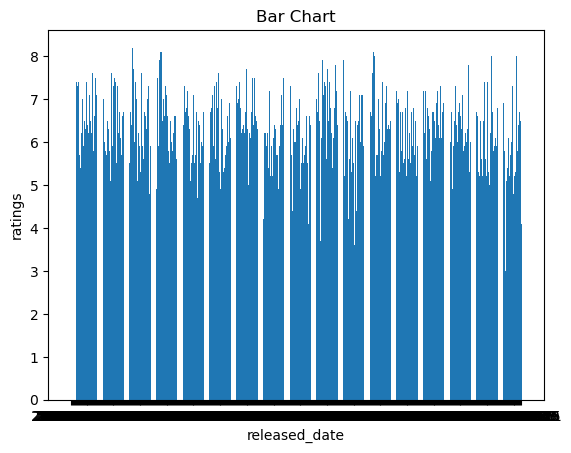

In [325]:
import pandas as pd
import matplotlib.pyplot as plt


# reading the database
data = pd.read_csv("movie.csv")

# Bar chart with day against tip
plt.bar(data['released_date'], data['ratings'])

plt.title("Bar Chart")

# Setting the X and Y labels
plt.xlabel('released_date')
plt.ylabel('ratings')

# Adding the legends
plt.show()


In [330]:
movie_df = pd.read_csv("scrape1.csv")
movie_df.head()

,Unnamed: 0,movie,year,time_minute,imdb_rating,metascore,vote,gross_earning
0,0,A Christmas Story,1983,93,7.9,77.0,151583,20.61
1,1,Triangle of Sadness,2022,147,7.7,63.0,27718,Null
2,2,All Quiet on the Western Front,2022,148,7.8,76.0,74549,Null
3,3,Top Gun: Maverick,2022,130,8.4,78.0,438268,Null
4,4,Everything Everywhere All at Once,2022,139,8.1,81.0,244709,Null


In [331]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1000 non-null   int64  
 1   movie          1000 non-null   object 
 2   year           1000 non-null   int64  
 3   time_minute    1000 non-null   int64  
 4   imdb_rating    1000 non-null   float64
 5   metascore      1000 non-null   object 
 6   vote           1000 non-null   int64  
 7   gross_earning  1000 non-null   object 
dtypes: float64(1), int64(4), object(3)
memory usage: 62.6+ KB


In [332]:
movie_df.duplicated().sum()

0

Text(0.5, 0, 'Movie running time(minutes)')

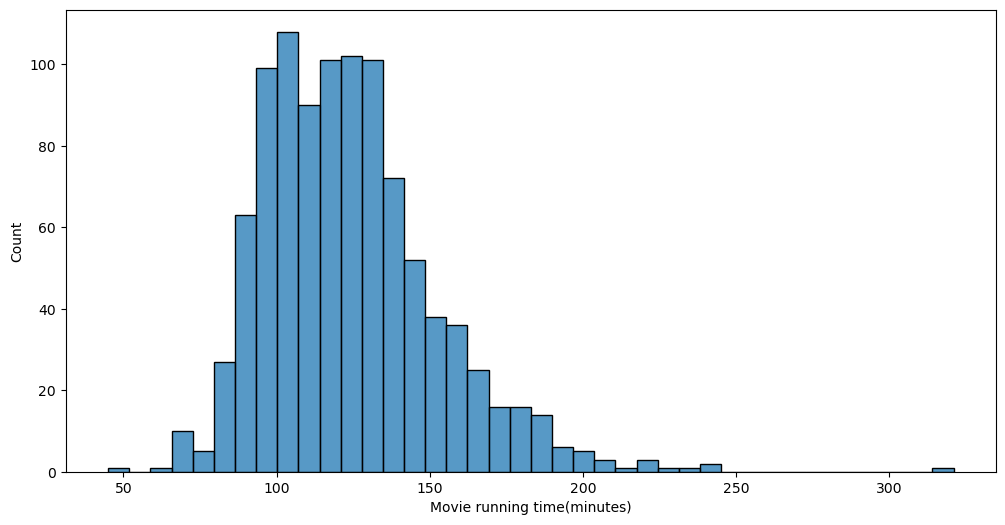

In [333]:
#Visualise the data according to Runtime ?
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(data=movie_df['time_minute'],ax=ax)
plt.xlabel('Movie running time(minutes)')

In [336]:
movie_df = pd.read_csv("genre.csv")
movie_df.head()

,movie_id,movie_title,genre,certification
0,25683,Avatar,Action Adventure Fantasy Science F...,PG13
1,14531,Pirates of the Caribbean: At World's End,Adventure Fantasy Action,PG13
2,18260,Spectre,Action Adventure Crime,PG13
3,25056,The Dark Knight Rises,Action Crime Drama Thriller,PG13
4,99197,John Carter,Action Adventure Science Fiction,PG13


In [337]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   movie_id       500 non-null    int64 
 1   movie_title    500 non-null    object
 2   genre          500 non-null    object
 3   certification  500 non-null    object
dtypes: int64(1), object(3)
memory usage: 15.8+ KB


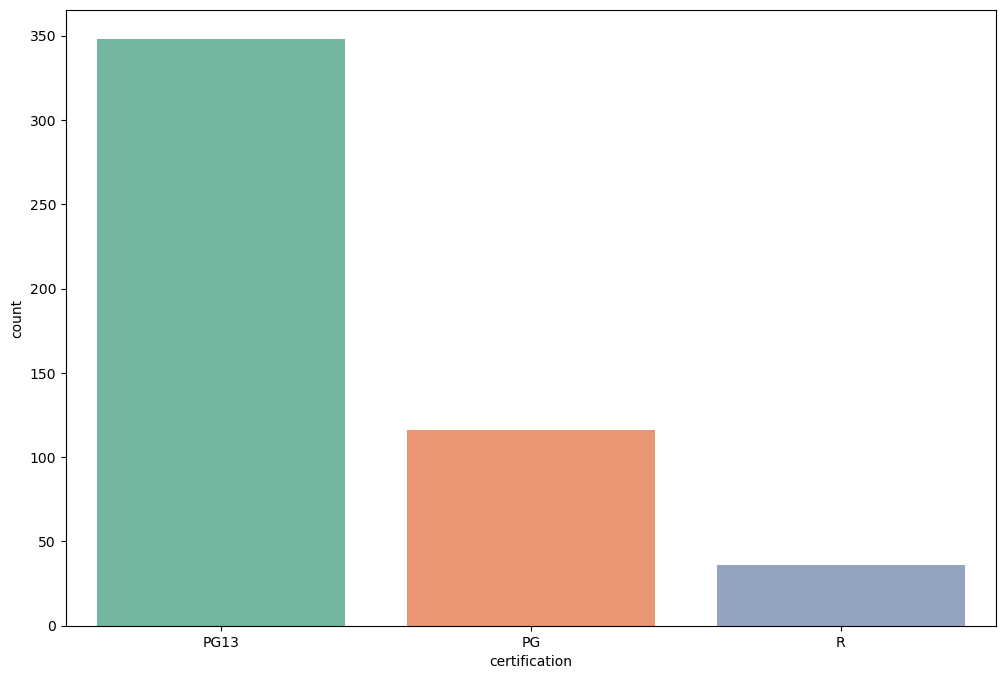

In [345]:
#Visualise the data according to the certification:
df2 = movie_df.groupby('certification')['movie_id'].mean() 
fig, ax1 = plt.subplots(figsize=(12,8))
ax1 = sns.countplot(x="certification", data=movie_df, palette="Set2",
                    ›order=movie_df['certification'].value_counts().index[0:13])

In [346]:
movie_df = pd.read_csv("movie.csv")
movie_df.head()

,movie_id,movie_title,released_date,about,streaming on,subscription,language,no.of reviews,ratings,award_name,true_story,companies
0,25683,Avatar,2009-12-10,"In the 22nd century, a paraplegic Marine is di...",hulu,yes,English,11800,7.2,True,False,Ingenious Film Partners Twentieth Century ...
1,14531,Pirates of the Caribbean: At World's End,2007-05-19,"Captain Barbossa, long believed to be dead, ha...",hulu,yes,English,4500,6.9,False,False,Walt Disney Pictures Jerry Bruckheimer Fil...
2,18260,Spectre,2015-10-26,A cryptic message from Bond’s past sends him o...,hulu,yes,English,4466,6.3,False,False,Columbia Pictures Danjaq B
3,25056,The Dark Knight Rises,2012-07-16,Following the death of District Attorney Harve...,netflix,yes,English,9106,7.6,True,False,Legendary Pictures Warner Bros. DC Ente...
4,99197,John Carter,2012-03-07,"John Carter is a war-weary, former military ca...",hulu,yes,English,2124,6.1,False,False,Walt Disney Pictures


In [347]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       500 non-null    int64  
 1   movie_title    500 non-null    object 
 2   released_date  500 non-null    object 
 3   about          500 non-null    object 
 4   streaming on   500 non-null    object 
 5   subscription   500 non-null    object 
 6   language       500 non-null    object 
 7   no.of reviews  500 non-null    int64  
 8   ratings        500 non-null    float64
 9   award_name     500 non-null    bool   
 10  true_story     500 non-null    bool   
 11  companies      500 non-null    object 
dtypes: bool(2), float64(1), int64(2), object(7)
memory usage: 40.2+ KB


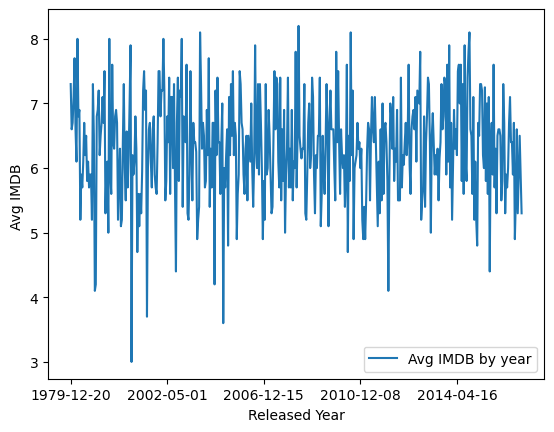

In [348]:
df1 = movie_df.groupby('released_date')['ratings'].mean()
df1.plot( label='Avg IMDB by year')
plt.legend()
plt.xlabel('Released Year')
plt.ylabel('Avg IMDB ')
plt.show()

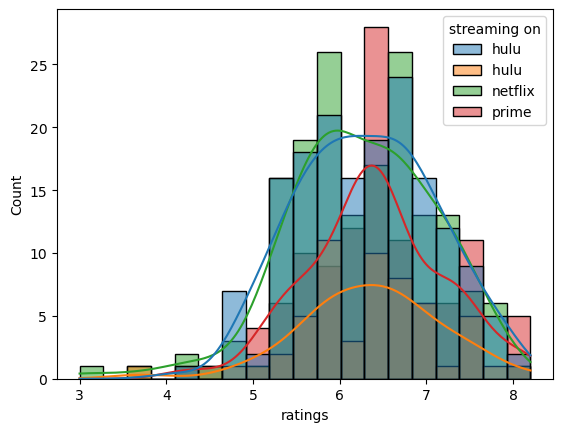

In [364]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# reading the database
data = pd.read_csv("movie.csv")

sns.histplot(x='ratings', data=data, kde=True, hue='streaming on')

plt.show()


In [4]:
#scraping data for tv shows from imdb
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd

In [5]:
url = 'https://www.imdb.com/chart/toptv/'
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

In [6]:
movies = soup.select('td.titleColumn')
crew = [a.attrs.get('title') for a in soup.select('td.titleColumn a')]
ratings = [b.attrs.get('data-value')
        for b in soup.select('td.posterColumn span[name=ir]')]

In [7]:
# create a empty list for storing
# movie information
list = []
 
# Iterating over movies to extract
# each movie's details
for index in range(0, len(movies)):
     
    # Separating movie into: 'place',
    # 'title', 'year'
    movie_string = movies[index].get_text()
    movie = (' '.join(movie_string.split()).replace('.', ''))
    movie_title = movie[len(str(index))+1:-7]
    year = re.search('\((.*?)\)', movie_string).group(1)
    place = movie[:len(str(index))-(len(movie))]
    data = {"place": place,
            "movie_title": movie_title,
            "rating": ratings[index],
            "year": year,
            "star_cast": crew[index],
            }
    list.append(data)

In [8]:
for movie in list:
    print(movie['place'], '-', movie['movie_title'], '('+movie['year'] +
          ') -', 'Starring:', movie['star_cast'], movie['rating'])

1 - Planet Earth II (2016) - Starring: David Attenborough, Chadden Hunter 9.437594044253103
2 - Breaking Bad (2008) - Starring: Bryan Cranston, Aaron Paul 9.428027510428292
3 - Planet Earth (2006) - Starring: Sigourney Weaver, David Attenborough 9.414656203005116
4 - Band of Brothers (2001) - Starring: Scott Grimes, Damian Lewis 9.391434477995729
5 - Chernobyl (2019) - Starring: Jessie Buckley, Jared Harris 9.31749157894375
6 - The Wire (2002) - Starring: Dominic West, Lance Reddick 9.291200093539306
7 - Blue Planet II (2017) - Starring: David Attenborough, Peter Drost 9.230957815870013
8 - Avatar: The Last Airbender (2005) - Starring: Dee Bradley Baker, Zach Tyler Eisen 9.229383375919294
9 - Cosmos: A Spacetime Odyssey (2014) - Starring: Neil deGrasse Tyson, Christopher Emerson 9.203239638064476
1 -  The Sopranos (1999) - Starring: James Gandolfini, Lorraine Bracco 9.200409728747385
11 - Cosmos (1980) - Starring: Carl Sagan, Jaromír Hanzlík 9.18787854459435
12 - Our Planet (2019) - St

In [9]:
#saving the list as dataframe
#then converting into .csv file
df = pd.DataFrame(list)
df.to_csv('dummy123.csv',index=False)

In [11]:
#connection between python and mysql workbench
conn=pymysql.connect(host='localhost',port=int(3306),user='root',passwd='Mysql@123',db='root')
cursor= conn.cursor()

NameError: name 'pymysql' is not defined

In [12]:
pip install pymysql

Note: you may need to restart the kernel to use updated packages.


In [14]:
import pymysql

In [75]:
#connection between python and mysql workbench
conn=pymysql.connect(host='localhost',port=int(3306),user='root',passwd='Mysql@123',db='root')
cursor= conn.cursor()

In [76]:
cursor.execute("CREATE TABLE TA(place INT ,movie_title VARCHAR(100),rating VARCHAR(100),year INT);")
records=cursor.fetchall()
print(records)
conn.commit()

()


In [77]:
cursor.execute("SELECT * from TA")
records=cursor.fetchall()
print(records)
conn.commit()

()


In [78]:
TA = pd.read_csv("dummy123.csv")

In [79]:
#Inserting data in User Table:- 
for index,row in TA.iterrows():
    cursor.execute("INSERT INTO TA values (%s,%s,%s,%s)", (int(row['place']),row['movie_title'],row['rating'],row['year']))
conn.commit()

In [80]:
def run_query(query):
    return pd.read_sql(query,conn)

In [81]:
run_query('select * from TA')

/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,place,movie_title,rating,year
0,1,Planet Earth II,9.437594044,2016
1,2,Breaking Bad,9.42802751,2008
2,3,Planet Earth,9.414656203,2006
3,4,Band of Brothers,9.391434478,2001
4,5,Chernobyl,9.317491579,2019
...,...,...,...,...
245,246,Black Books,8.415186047,2000
246,247,John Adams,8.414571502,2008
247,248,The Defiant Ones,8.414300033,2017
248,249,X-Men: The Animated Series,8.413703591,1992


In [52]:
import pymysql

In [53]:
#connection between python and mysql workbench
conn=pymysql.connect(host='localhost',port=int(3306),user='root',passwd='Mysql@123',db='movie_db')
cursor= conn.cursor()

In [56]:
cursor.execute("CREATE TABLE DIRECTOR(movie_id INT ,movie_title VARCHAR(100) ,director VARCHAR(100),critics_rating INT);")
records=cursor.fetchall()
print(records)
conn.commit()

OperationalError: (1050, "Table 'director' already exists")

In [57]:
cursor.execute("SELECT * from director")
records=cursor.fetchall()
print(records)
conn.commit()

()


In [58]:
director = pd.read_csv("director.csv")

In [63]:
#Inserting data in User Table:- 
for index,row in director.iterrows():
    cursor.execute("INSERT INTO director values (%s,%s,%s,%s)", (int(row['movie_id']),row['movie_title'],row['director'],int(row['critics_rating'])))
conn.commit()

In [64]:
def run_query(query):
    return pd.read_sql(query,conn)

In [65]:
run_query('select * from director')

/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,movie_id,movie_title,director,critics_rating
0,25683,Avatar,James cameran,7
1,14531,Pirates of the Caribbean: At World's End,Gore Verbinski,6
2,18260,Spectre,Sam mendes,6
3,25056,The Dark Knight Rises,Christoper Nolan,7
4,99197,John Carter,Andrew Stanton,6
...,...,...,...,...
495,75730,Journey 2: The Mysterious Island,Brad Peyton,5
496,78945,Cloudy with a Chance of Meatballs 2,Cody Cameron,6
497,57476,Red Dragon,Brett Ratner,6
498,55309,Hidalgo,Joe Johnston,6


In [68]:
cursor.execute("CREATE TABLE CAST (movie_id INT ,movie_title VARCHAR(100) ,cast VARCHAR(500);")
records=cursor.fetchall()
print(records)
conn.commit()

ProgrammingError: (1064, "You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near '' at line 1")

In [69]:
import pymysql

In [70]:
#connection between python and mysql workbench
conn=pymysql.connect(host='localhost',port=int(3306),user='root',passwd='Mysql@123',db='moviedb')
cursor= conn.cursor()

In [79]:
cursor.execute("CREATE TABLE `cast`(movie_id INT ,movie_title VARCHAR(100) ,cast VARCHAR(1000));")
records=cursor.fetchall()
print(records)
conn.commit()

OperationalError: (1050, "Table 'cast' already exists")

In [81]:
director = pd.read_csv("director.csv")

In [82]:
#Inserting data in User Table:- 
for index,row in cast.iterrows():
    cursor.execute("INSERT INTO cast values (%s,%s,%s)", (int(row['movie_id']),row['movie_title'],row['cast']))
conn.commit()

DataError: (1406, "Data too long for column 'cast' at row 1")

In [83]:
cursor.execute("CREATE TABLE `director`(movie_id INT ,movie_title VARCHAR(100) ,director VARCHAR(100),critics_rating INT);")
records=cursor.fetchall()
print(records)
conn.commit()

()


In [84]:
director = pd.read_csv("director.csv")

In [85]:
#Inserting data in User Table:- 
for index,row in director.iterrows():
    cursor.execute("INSERT INTO director values (%s,%s,%s,%s)", (int(row['movie_id']),row['movie_title'],row['director'],int(row['critics_rating'])))
conn.commit()

In [86]:
def run_query(query):
    return pd.read_sql(query,conn)

In [87]:
run_query('select * from director')

/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,movie_id,movie_title,director,critics_rating
0,25683,Avatar,James cameran,7
1,14531,Pirates of the Caribbean: At World's End,Gore Verbinski,6
2,18260,Spectre,Sam mendes,6
3,25056,The Dark Knight Rises,Christoper Nolan,7
4,99197,John Carter,Andrew Stanton,6
...,...,...,...,...
495,75730,Journey 2: The Mysterious Island,Brad Peyton,5
496,78945,Cloudy with a Chance of Meatballs 2,Cody Cameron,6
497,57476,Red Dragon,Brett Ratner,6
498,55309,Hidalgo,Joe Johnston,6


In [88]:
cursor.execute("CREATE TABLE `cast`(movie_id INT ,movie_title VARCHAR(100) ,cast VARCHAR(5000));")
records=cursor.fetchall()
print(records)
conn.commit()

()


In [89]:
cast = pd.read_csv("cast.csv")

In [95]:
#Inserting data in User Table:- 
for index,row in director.iterrows():
    cursor.execute("INSERT INTO cast values (%s,%s,%s)", (int(row['movie_id']),row['movie_title'],row[`'cast'`]))
conn.commit()

SyntaxError: invalid syntax (4105609574.py, line 3)

In [97]:
cursor.execute("CREATE TABLE `budget`(movie_id INT ,movie_title VARCHAR(100) ,budget INT);")
records=cursor.fetchall()
print(records)
conn.commit()

()


In [98]:
budget = pd.read_csv("budget.csv")

In [99]:
#Inserting data in User Table:- 
for index,row in budget.iterrows():
    cursor.execute("INSERT INTO budget values (%s,%s,%s)", (int(row['movie_id']),row['movie_title'],int(row['budget'])))
conn.commit()

In [100]:
def run_query(query):
    return pd.read_sql(query,conn)

In [101]:
run_query('select * from budget')

/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,movie_id,movie_title,budget
0,25683,Avatar,237000000
1,14531,Pirates of the Caribbean: At World's End,300000000
2,18260,Spectre,245000000
3,25056,The Dark Knight Rises,250000000
4,99197,John Carter,260000000
...,...,...,...
495,75730,Journey 2: The Mysterious Island,79000000
496,78945,Cloudy with a Chance of Meatballs 2,78000000
497,57476,Red Dragon,78000000
498,55309,Hidalgo,100000000


In [109]:
cursor.execute("CREATE TABLE `earnings`(movie_id INT ,movie_title VARCHAR(100) ,opening VARCHAR(100), gross BIGINT, votes INT);")
records=cursor.fetchall()
print(records)
conn.commit()

()


In [110]:
earnings = pd.read_csv("earnings.csv")

In [111]:
#Inserting data in User Table:- 
for index,row in earnings.iterrows():
    cursor.execute("INSERT INTO earnings values (%s,%s,%s,%s,%s)", (int(row['movie_id']),row['movie_title'],row['opening'],int(row['gross']),int(row['votes'])))
conn.commit()

In [108]:
cursor.execute("DROP TABLE earnings")
records=cursor.fetchall()
print(records)
conn.commit()

()


In [112]:
def run_query(query):
    return pd.read_sql(query,conn)

In [113]:
run_query('select * from earnings')

/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,movie_id,movie_title,opening,gross,votes
0,25683,Avatar,Blockbluster,2787965087,11800
1,14531,Pirates of the Caribbean: At World's End,Blockbluster,961000000,4500
2,18260,Spectre,Flop,880674609,4466
3,25056,The Dark Knight Rises,Blockbluster,1084939099,9106
4,99197,John Carter,Flop,284139100,2124
...,...,...,...,...,...
495,75730,Journey 2: The Mysterious Island,Blockbluster,355692760,1030
496,78945,Cloudy with a Chance of Meatballs 2,Blockbluster,248384621,915
497,57476,Red Dragon,Blockbluster,209196298,1115
498,55309,Hidalgo,Flop,108103450,318


In [116]:
cursor.execute("CREATE TABLE `festiveFilm`(movie_id INT ,movie_title VARCHAR(100) ,country VARCHAR(100), festival VARCHAR(100));")
records=cursor.fetchall()
print(records)
conn.commit()

()


In [117]:
festiveFilm = pd.read_csv("festiveFilm.csv")

In [122]:
festiveFilm = festiveFilm.replace(np.nan, None)

In [123]:
#Inserting data in User Table:- 
for index,row in festiveFilm.iterrows():
    cursor.execute("INSERT INTO festiveFilm values (%s,%s,%s,%s)", (int(row['movie_id']),row['movie_title'],row['country'],row['festival']))
conn.commit()

In [124]:
def run_query(query):
    return pd.read_sql(query,conn)

In [125]:
run_query('select * from festiveFilm')

/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,movie_id,movie_title,country,festival
0,25683,Avatar,United States of America United Kingdom,Cannes
1,14531,Pirates of the Caribbean: At World's End,United States of America,Cannes
2,18260,Spectre,United Kingdom United States of America,Berlin
3,25056,The Dark Knight Rises,United States of America,Venice
4,99197,John Carter,United States of America,Cannes
...,...,...,...,...
1039,75730,Journey 2: The Mysterious Island,United States of America,Venice
1040,78945,Cloudy with a Chance of Meatballs 2,United States of America,Cannes
1041,57476,Red Dragon,Germany United States of America,Berlin
1042,55309,Hidalgo,United States of America Morocco,Venice


In [126]:
cursor.execute("CREATE TABLE `genre`(movie_id INT ,movie_title VARCHAR(100) ,genre VARCHAR(100), certification VARCHAR(100));")
records=cursor.fetchall()
print(records)
conn.commit()

()


In [127]:
genre = pd.read_csv("genre.csv")

In [128]:
#Inserting data in User Table:- 
for index,row in genre.iterrows():
    cursor.execute("INSERT INTO genre values (%s,%s,%s,%s)", (int(row['movie_id']),row['movie_title'],row['genre'],row['certification']))
conn.commit()

In [129]:
def run_query(query):
    return pd.read_sql(query,conn)

In [130]:
run_query('select * from genre')

/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,movie_id,movie_title,genre,certification
0,25683,Avatar,Action Adventure Fantasy Science F...,PG13
1,14531,Pirates of the Caribbean: At World's End,Adventure Fantasy Action,PG13
2,18260,Spectre,Action Adventure Crime,PG13
3,25056,The Dark Knight Rises,Action Crime Drama Thriller,PG13
4,99197,John Carter,Action Adventure Science Fiction,PG13
...,...,...,...,...
495,75730,Journey 2: The Mysterious Island,Adventure Action Science Fiction,PG
496,78945,Cloudy with a Chance of Meatballs 2,Animation Family Comedy,PG13
497,57476,Red Dragon,Crime Thriller Horror,PG13
498,55309,Hidalgo,Western Adventure,PG13


In [131]:
cursor.execute("CREATE TABLE `ratings`(movie_id INT ,movie_title VARCHAR(100) , rating INT);")
records=cursor.fetchall()
print(records)
conn.commit()

()


In [132]:
ratings = pd.read_csv("ratings.csv")

In [134]:
#Inserting data in User Table:- 
for index,row in ratings.iterrows():
    cursor.execute("INSERT INTO ratings values (%s,%s,%s)", (int(row['movie_id']),row['movie_title'],int(row['rating'])))
conn.commit()

In [135]:
def run_query(query):
    return pd.read_sql(query,conn)

In [136]:
run_query('select * from ratings')

/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,movie_id,movie_title,rating
0,25683,Avatar,7
1,14531,Pirates of the Caribbean: At World's End,6
2,18260,Spectre,6
3,25056,The Dark Knight Rises,7
4,99197,John Carter,6
...,...,...,...
495,75730,Journey 2: The Mysterious Island,5
496,78945,Cloudy with a Chance of Meatballs 2,6
497,57476,Red Dragon,6
498,55309,Hidalgo,6


In [137]:
cursor.execute("CREATE TABLE `review`(movie_id INT ,movie_title VARCHAR(100) , review VARCHAR(100));")
records=cursor.fetchall()
print(records)
conn.commit()

()


In [138]:
review = pd.read_csv("review.csv")

In [142]:
#Inserting data in User Table:- 
for index,row in review.iterrows():
    cursor.execute("INSERT INTO review values (%s,%s,%s)", (int(row['movie_id']),row['movie_title'],row['review']))
conn.commit()

In [143]:
def run_query(query):
    return pd.read_sql(query,conn)

In [144]:
run_query('select * from review')

/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,movie_id,movie_title,review
0,75366,Avatar,Best
1,36545,Pirates of the Caribbean: At World's End,Good
2,18087,Spectre,Good
3,54170,The Dark Knight Rises,Best
4,68880,John Carter,Good
...,...,...,...
495,85246,Journey 2: The Mysterious Island,Bad
496,24138,Cloudy with a Chance of Meatballs 2,Good
497,41000,Red Dragon,Good
498,45939,Hidalgo,Good


In [147]:
cursor.execute("DROP TABLE scrape1")
records=cursor.fetchall()
print(records)
conn.commit()

()


In [179]:
cursor.execute("CREATE TABLE `tvshow`(id INT ,tvshows VARCHAR(100),rating DECIMAL(2,2), year INT, star_cast VARCHAR(100), field6 VARCHAR(100), platform VARCHAR(100), subscriptions VARCHAR(100), originals VARCHAR(100));")
records=cursor.fetchall()
print(records)
conn.commit()

()


In [220]:
cursor.execute("DROP TABLE tvshow")
records=cursor.fetchall()
print(records)
conn.commit()

()


In [217]:
cursor.execute("CREATE TABLE `tvshow`(id INT ,tvshows VARCHAR(100),rating DECIMAL(2,2), year INT, star_cast VARCHAR(100), platform VARCHAR(100), subscription TEXT(100), originals VARCHAR(100));")
records=cursor.fetchall()
print(records)
conn.commit()

()


In [148]:
cursor.execute("CREATE TABLE `scrape1`(field1 INT ,movie VARCHAR(100),year INT, time_minute INT, imdb_rating DECIMAL(2,2), metascore VARCHAR(100), vote INT, gross_earning VARCHAR(100));")
records=cursor.fetchall()
print(records)
conn.commit()

()


In [153]:
scrape1 = pd.read_csv("scrape1.csv")

In [159]:
scrape1 = scrape1.replace(np.nan, None)

In [210]:
cursor.execute("DROP TABLE movie")
records=cursor.fetchall()
print(records)
conn.commit()

()


In [211]:
cursor.execute("CREATE TABLE `movie`(movie_id INT ,movie_title VARCHAR(100) , released_date VARCHAR(100), about VARCHAR(100), streamingon VARCHAR(100), subscription VARCHAR(100), language VARCHAR(100), `no.ofreviews` INT, ratings INT, award_name VARCHAR(100),true_story VARCHAR(100),companies VARCHAR(100));")
records=cursor.fetchall()
print(records)
conn.commit()

()


In [212]:
movie = pd.read_csv("movie.csv")

In [ ]:
#Assignment 4 start

In [251]:
#1NF
df = pd.read_csv("genre.csv")

In [252]:
df

,movie_id,movie_title,genre,certification
0,25683,Avatar,Action Adventure Fantasy Science F...,PG13
1,14531,Pirates of the Caribbean: At World's End,Adventure Fantasy Action,PG13
2,18260,Spectre,Action Adventure Crime,PG13
3,25056,The Dark Knight Rises,Action Crime Drama Thriller,PG13
4,99197,John Carter,Action Adventure Science Fiction,PG13
...,...,...,...,...
495,75730,Journey 2: The Mysterious Island,Adventure Action Science Fiction,PG
496,78945,Cloudy with a Chance of Meatballs 2,Animation Family Comedy,PG13
497,57476,Red Dragon,Crime Thriller Horror,PG13
498,55309,Hidalgo,Western Adventure,PG13


In [329]:
df = pd.read_csv("genre.csv")

In [330]:
df['genre']=df['genre'].str.split( "    ")
df.explode(['genre'])

,movie_id,movie_title,genre,certification
0,25683,Avatar,Action,PG13
0,25683,Avatar,Adventure,PG13
0,25683,Avatar,Fantasy,PG13
0,25683,Avatar,Science Fiction,PG13
1,14531,Pirates of the Caribbean: At World's End,Adventure,PG13
...,...,...,...,...
497,57476,Red Dragon,Thriller,PG13
497,57476,Red Dragon,Horror,PG13
498,55309,Hidalgo,Western,PG13
498,55309,Hidalgo,Adventure,PG13


In [331]:
df.to_csv("1NF_genre.csv")

In [326]:
df = pd.read_csv("festiveFilm.csv")

In [314]:
df

,movie_id,movie_title,country,festival
0,25683,Avatar,United States of America United Kingdom,Cannes
1,14531,Pirates of the Caribbean: At World's End,United States of America,Cannes
2,18260,Spectre,United Kingdom United States of America,Berlin
3,25056,The Dark Knight Rises,United States of America,Venice
4,99197,John Carter,United States of America,Cannes
...,...,...,...,...
495,75730,Journey 2: The Mysterious Island,United States of America,Venice
496,78945,Cloudy with a Chance of Meatballs 2,United States of America,Cannes
497,57476,Red Dragon,Germany United States of America,Berlin
498,55309,Hidalgo,United States of America Morocco,Venice


In [327]:
df['country']=df['country'].str.split( "    ")
df.explode(['country'])

,movie_id,movie_title,country,festival
0,25683,Avatar,United States of America,Cannes
0,25683,Avatar,United Kingdom,Cannes
1,14531,Pirates of the Caribbean: At World's End,United States of America,Cannes
2,18260,Spectre,United Kingdom,Berlin
2,18260,Spectre,United States of America,Berlin
...,...,...,...,...
497,57476,Red Dragon,Germany,Berlin
497,57476,Red Dragon,United States of America,Berlin
498,55309,Hidalgo,United States of America,Venice
498,55309,Hidalgo,Morocco,Venice


In [328]:
df.to_csv("1NF_festiveFilm.csv")

In [332]:
df = pd.read_csv("movie.csv")

In [333]:
df

,movie_id,movie_title,released_date,about,streaming on,subscription,language,no.of reviews,ratings,award_name,true_story,companies
0,25683,Avatar,2009-12-10,"In the 22nd century, a paraplegic Marine is di...",hulu,yes,English,11800,7.2,True,False,Ingenious Film Partners Twentieth Century ...
1,14531,Pirates of the Caribbean: At World's End,2007-05-19,"Captain Barbossa, long believed to be dead, ha...",hulu,yes,English,4500,6.9,False,False,Walt Disney Pictures Jerry Bruckheimer Fil...
2,18260,Spectre,2015-10-26,A cryptic message from Bond’s past sends him o...,hulu,yes,English,4466,6.3,False,False,Columbia Pictures Danjaq B
3,25056,The Dark Knight Rises,2012-07-16,Following the death of District Attorney Harve...,netflix,yes,English,9106,7.6,True,False,Legendary Pictures Warner Bros. DC Ente...
4,99197,John Carter,2012-03-07,"John Carter is a war-weary, former military ca...",hulu,yes,English,2124,6.1,False,False,Walt Disney Pictures
...,...,...,...,...,...,...,...,...,...,...,...,...
495,75730,Journey 2: The Mysterious Island,2012-01-19,Sean Anderson partners with his mom's boyfrien...,hulu,yes,English,1030,5.8,False,False,New Line Cinema Contrafilm Walden Media
496,78945,Cloudy with a Chance of Meatballs 2,2013-09-26,After the disastrous food storm in the first f...,hulu,yes,English,915,6.4,False,False,Columbia Pictures Sony
497,57476,Red Dragon,2002-09-29,"Former FBI Agent Will Graham, who was once alm...",hulu,yes,English,1115,6.7,False,False,Universal Pictures Metro-Goldwyn-Mayer (MG...
498,55309,Hidalgo,2004-03-05,"Set in 1890, this is the story of a Pony Expre...",netflix,yes,English,318,6.5,False,False,Casey Silver Productions Touchstone Pictur...


In [341]:
df = pd.read_csv("movie.csv")

In [342]:
df['companies']=df['companies'].str.split( "   ")
df.explode(['companies'])

,movie_id,movie_title,released_date,about,streaming on,subscription,language,no.of reviews,ratings,award_name,true_story,companies
0,25683,Avatar,2009-12-10,"In the 22nd century, a paraplegic Marine is di...",hulu,yes,English,11800,7.2,True,False,Ingenious Film Partners
0,25683,Avatar,2009-12-10,"In the 22nd century, a paraplegic Marine is di...",hulu,yes,English,11800,7.2,True,False,Twentieth Century Fox Film Corporation
0,25683,Avatar,2009-12-10,"In the 22nd century, a paraplegic Marine is di...",hulu,yes,English,11800,7.2,True,False,Dune Entertainment
0,25683,Avatar,2009-12-10,"In the 22nd century, a paraplegic Marine is di...",hulu,yes,English,11800,7.2,True,False,Lightstorm Entertainment
1,14531,Pirates of the Caribbean: At World's End,2007-05-19,"Captain Barbossa, long believed to be dead, ha...",hulu,yes,English,4500,6.9,False,False,Walt Disney Pictures
...,...,...,...,...,...,...,...,...,...,...,...,...
498,55309,Hidalgo,2004-03-05,"Set in 1890, this is the story of a Pony Expre...",netflix,yes,English,318,6.5,False,False,Touchstone Pictures
498,55309,Hidalgo,2004-03-05,"Set in 1890, this is the story of a Pony Expre...",netflix,yes,English,318,6.5,False,False,Dune Films
499,72551,Jack and Jill,2011-11-11,"Jack Sadelstein, a successful advertising exec...",hulu,yes,English,604,4.1,False,False,Columbia Pictures
499,72551,Jack and Jill,2011-11-11,"Jack Sadelstein, a successful advertising exec...",hulu,yes,English,604,4.1,False,False,Happy Madison Productions


In [343]:
df.to_csv("1NF_company.csv")

In [344]:
#2NF
df = pd.read_csv("countryFest.csv")

In [345]:
df

,movie_id,movie_title,country,festival
0,25683,Avatar,United States of America,Cannes
1,14531,Pirates of the Caribbean: At World's End,United States of America,Cannes
2,18260,Spectre,Germany,Berlin
3,25056,The Dark Knight Rises,Spain,Venice
4,99197,John Carter,United States of America,Cannes
...,...,...,...,...
495,75730,Journey 2: The Mysterious Island,Spain,Venice
496,78945,Cloudy with a Chance of Meatballs 2,United States of America,Cannes
497,57476,Red Dragon,Germany,Berlin
498,55309,Hidalgo,Spain,Venice


In [358]:
df1=df[['movie_id','movie_title','country']]
df2=df[['country','festival']]

In [359]:
print(f"Unique FN: {df['country'].unique()}")

Unique FN: ['United States of America' 'Germany' 'Spain' 'Italy' 'Australia' 'Canada']


In [376]:
df4=(f"Unique Values from 2 Columns:\
{pd.concat([df['country'],df['festival']]).unique()}")

In [377]:
df4

"Unique Values from 2 Columns:['United States of America' 'Germany' 'Spain' 'Italy' 'Australia' 'Canada'\n 'Cannes' 'Berlin' 'Venice' 'Sundance' 'Rotterdam' 'Toronto']"

In [378]:
df1


,movie_id,movie_title,country
0,25683,Avatar,United States of America
1,14531,Pirates of the Caribbean: At World's End,United States of America
2,18260,Spectre,Germany
3,25056,The Dark Knight Rises,Spain
4,99197,John Carter,United States of America
...,...,...,...
495,75730,Journey 2: The Mysterious Island,Spain
496,78945,Cloudy with a Chance of Meatballs 2,United States of America
497,57476,Red Dragon,Germany
498,55309,Hidalgo,Spain


In [379]:
df.to_csv("2NF_Table1.csv")

In [380]:
df = pd.read_csv("2NF_Table2.csv")

In [381]:
df

,country,festival
0,United States of America,Cannes
1,Germany,Berlin
2,Spain,Venice
3,Italy,Sundance
4,Australia,Rotterdam
5,Canada,Toronto


In [384]:
#3NF
df = pd.read_csv("restriction.csv")

In [385]:
df

,movie_id,movie_title,genre,age_restriction
0,25683,Avatar,Action,PG13
1,14531,Pirates of the Caribbean: At World's End,Action,PG13
2,18260,Spectre,Action,PG13
3,25056,The Dark Knight Rises,Action,PG13
4,99197,John Carter,Action,PG13
...,...,...,...,...
495,75730,Journey 2: The Mysterious Island,Family,PG
496,78945,Cloudy with a Chance of Meatballs 2,Action,PG13
497,57476,Red Dragon,Action,PG13
498,55309,Hidalgo,Action,PG13


In [386]:
df1=df[['movie_id','movie_title','genre']]
df2=df[['genre','age_restriction']]

In [387]:
df1

,movie_id,movie_title,genre
0,25683,Avatar,Action
1,14531,Pirates of the Caribbean: At World's End,Action
2,18260,Spectre,Action
3,25056,The Dark Knight Rises,Action
4,99197,John Carter,Action
...,...,...,...
495,75730,Journey 2: The Mysterious Island,Family
496,78945,Cloudy with a Chance of Meatballs 2,Action
497,57476,Red Dragon,Action
498,55309,Hidalgo,Action


In [389]:
print(f"Unique FN: {df['genre'].unique()}")

Unique FN: ['Action' 'Family' 'Romance']


In [390]:
df4=(f"Unique Values from 2 Columns:\
{pd.concat([df['genre'],df['age_restriction']]).unique()}")

In [391]:
df4

"Unique Values from 2 Columns:['Action' 'Family' 'Romance' 'PG13' 'PG' 'R']"

In [392]:
df1.to_csv("3NF_Table1.csv")

In [393]:
df = pd.read_csv("3NF_Table2.csv")

In [394]:
df

,genre,age_restriction
0,Action,PG13
1,Family,PG
2,Romance,R
